# 1. Data cleaning including missing values, outliers and multi-collinearity. 
## Data Cleaning

### Handling Missing Values
I performed data cleaning by inspecting and handling missing values. Fortunately, there were no missing values in the dataset.

### Removing Columns
To simplify the dataset, I removed the columns containing customer and merchant names.

### Outliers
I decided not to remove outliers at this stage since we need to detect outliers, especially in the context of fraud detection. Removing outliers prematurely could lead to the loss of valuable fraud-related information.

### Multicollinearity
As part of data cleaning, I checked for multicollinearity among variables. Fortunately, there were no highly correlated variables in the dataset.

## 2. Describe your fraud detection model in elaboration.  

### Model Selection: Isolation Forest Algorithm
For fraud detection, I opted to use the Isolation Forest algorithm, which is widely employed in fraud detection models due to its effectiveness in isolating anomalies.

### Data Preprocessing
1. **Data Splitting:**
   - After cleaning the data, I split it into training and test datasets, with 10% reserved for the test dataset.

2. **Visualization:**
   - To gain insights into the data, I plotted graphs visualizing fraud and normal transactions with respect to the transaction amount and steps.

3. **Normalization and Scaling:**
   - I normalized and scaled down the data to ensure uniformity and assist the Isolation Forest algorithm.

### Model Training
1. **Isolation Forest Configuration:**
   - I configured the Isolation Forest model with parameters:
     - `n_estimators=100`
     - `max_samples` set to the size of the training data
     - `contamination` set to 0.001.

2. **Model Fitting:**
   - I fitted the Isolation Forest model on the training data.

### Model Evaluation
1. **Accuracy:**
   - The model achieved an accuracy of 99.80% on the training data and 99.79% on the test data.

2. **Confusion Matrix:**
   - I presented the confusion matrix, detailing true positives, true negatives, false positives, and false negatives.

3. **Precision-Recall:**
   - Precision and recall metrics were also calculated and visualized for a comprehensive evaluation.

### Conclusion
The Isolation Forest algorithm demonstrated high accuracy in detecting fraud, as evidenced by the evaluation metrics and visualizations.
## 3. How did you select variables to be included in the model? 

### Inclusion of Features
I carefully selected features that are likely to influence the outcome of identifying outliers (fraud transactions). The features included in the model are:
- `amount`
- `oldbalanceOrg`
- `newbalanceOrig`
- `oldbalanceDest`
- `newbalanceDest`
- `isFlaggedFraud`

### Exclusion of Features
I excluded the `customer name` and `merchant name`parameter as I deemed it unnecessary for the model. The focus was on variables that provide meaningful information for detecting outliers.

### Handling Categorical Data
There was categorical data in the form of the `type` of transaction. To incorporate this information, I applied one-hot encoding to properly represent the different transaction types.

### Output Variable
The target variable for the model is `isFraud`, indicating whether a transaction is fraudulent or not.

### Isolation Forest Parameters
In configuring the Isolation Forest algorithm, I used standard and recommended values for some parameters:
- `n_estimators`: 100 (standard recommendation)
- `max_samples`: Set to the size of the training data (standard recommendation)

### Contamination Parameter
To set the `contamination` parameter, I observed the fraction of fraud instances in the dataset, which was approximately 0.00129. Consequently, I chose a contamination value of 0.001, as it yielded the best accuracy during model training.


In [25]:
#Import the required libraries

import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_splitqqqq
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]
import plotly.graph_objs as go
import plotly
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot

In [2]:
data = pd.read_csv('Fraud.csv') #read the data
data.head() #get the first 5 rows of the data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
data.shape #size of the data

(6362620, 11)

In [4]:
data =  pd.get_dummies(data, columns = ['type'],dtype=int) #one-hot encoding for type so we can have use this feature

In [5]:
data #data after one hot encoding

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,0,1
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,0,1,0,0,0
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,0,0,0,0,1
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,0,1,0,0,0
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0,0,0,0,1


In [6]:
data=data.drop('nameOrig',axis=1) #removing the columns which we can not use as feature
data=data.drop('nameDest',axis=1)

In [7]:
data

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,0,0,1,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,0,0,1,0
2,1,181.00,181.00,0.00,0.00,0.00,1,0,0,0,0,0,1
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,0,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,0,1,0,0,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,0,0,0,0,1
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,0,1,0,0,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,0,0,0,0,1


In [8]:
# Checking the missing values
data.isnull().sum()

step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
type_CASH_IN      0
type_CASH_OUT     0
type_DEBIT        0
type_PAYMENT      0
type_TRANSFER     0
dtype: int64

In [9]:
data.describe() #more details about the data

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06,2.199226e-01,3.516633e-01,6.511783e-03,3.381461e-01,8.375622e-02
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03,4.141940e-01,4.774895e-01,8.043246e-02,4.730786e-01,2.770219e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [37]:
sample=data.sample(frac=0.01)

## Key Factors Predicting Fraudulent Customers

I conducted a thorough analysis by plotting scatter plots for each feature with respect to the 'isFraud' label. Here are the key observations:

1. **Amount of Transaction:**
   - Higher transaction amounts tend to have fewer instances of fraud.

2. **New Balance of Customer:**
   - Higher new balances for customers are associated with a lower number of fraud instances.

3. **Old Balance of Merchants:**
   - Higher old balances for merchants are associated with a lower number of fraud instances.

4. **New Balance of Merchants:**
   - Higher new balances for merchants are associated with a lower number of fraud instances.

5. **IsFlaggedFraud:**
   - The 'isFlaggedFraud' feature predicts fraud correctly in a significant number of cases. However, it may not perform well at detecting outliers.

These observations provide insights into key factors that may contribute to predicting fraudulent customers. Further analysis and feature engineering can help refine the model and improve predictive accuracy.


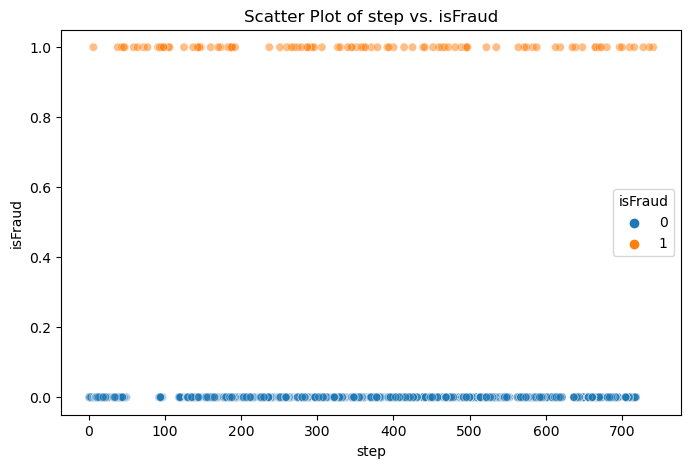

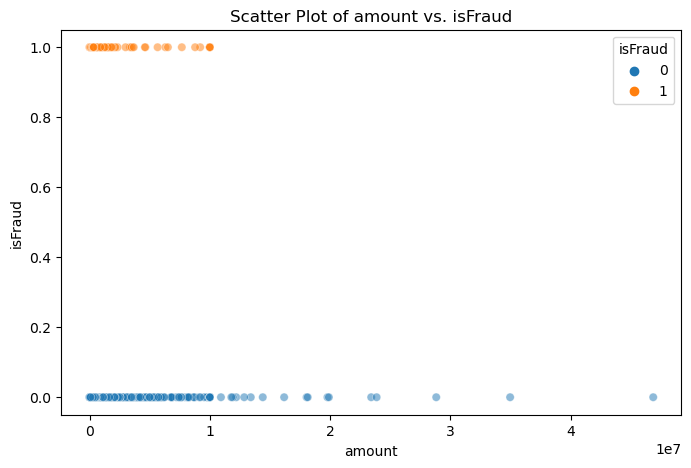

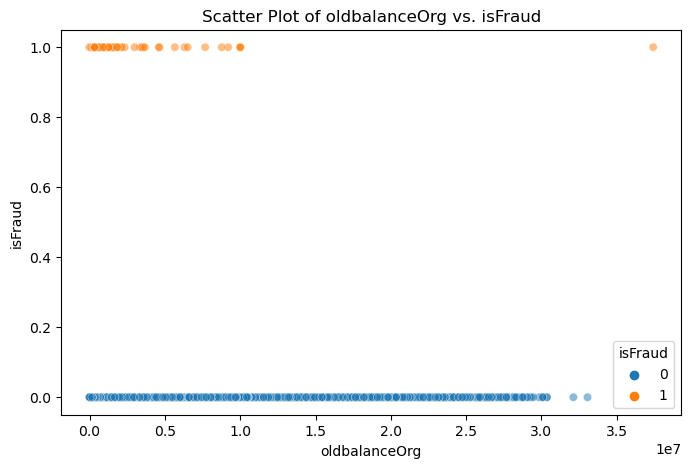

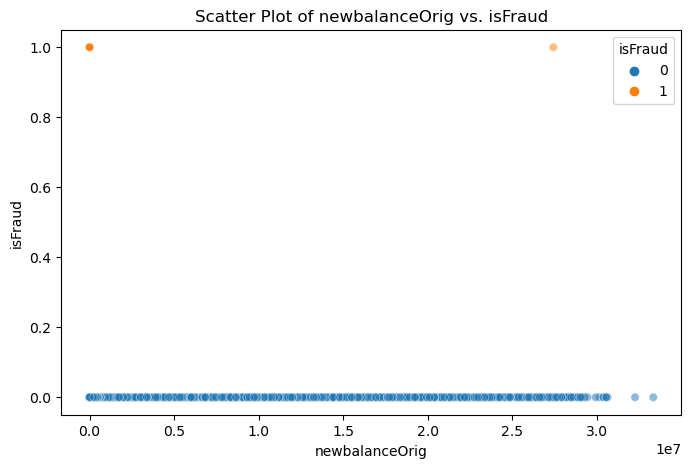

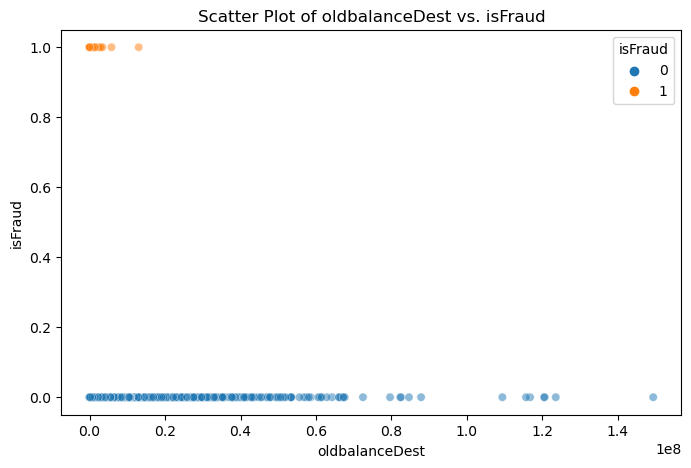

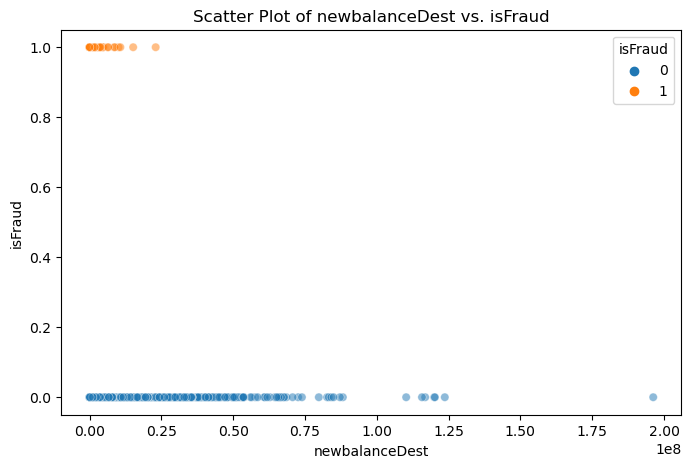

In [38]:
columns_to_plot = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
                   'oldbalanceDest', 'newbalanceDest']

# Create scatter plots for each column against 'isFraud'
for column in columns_to_plot:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=column, y='isFraud', hue='isFraud', data=sample, marker='o', alpha=0.5)
    plt.title(f"Scatter Plot of {column} vs. isFraud")
    plt.xlabel(column)
    plt.ylabel('isFraud')
    plt.show()

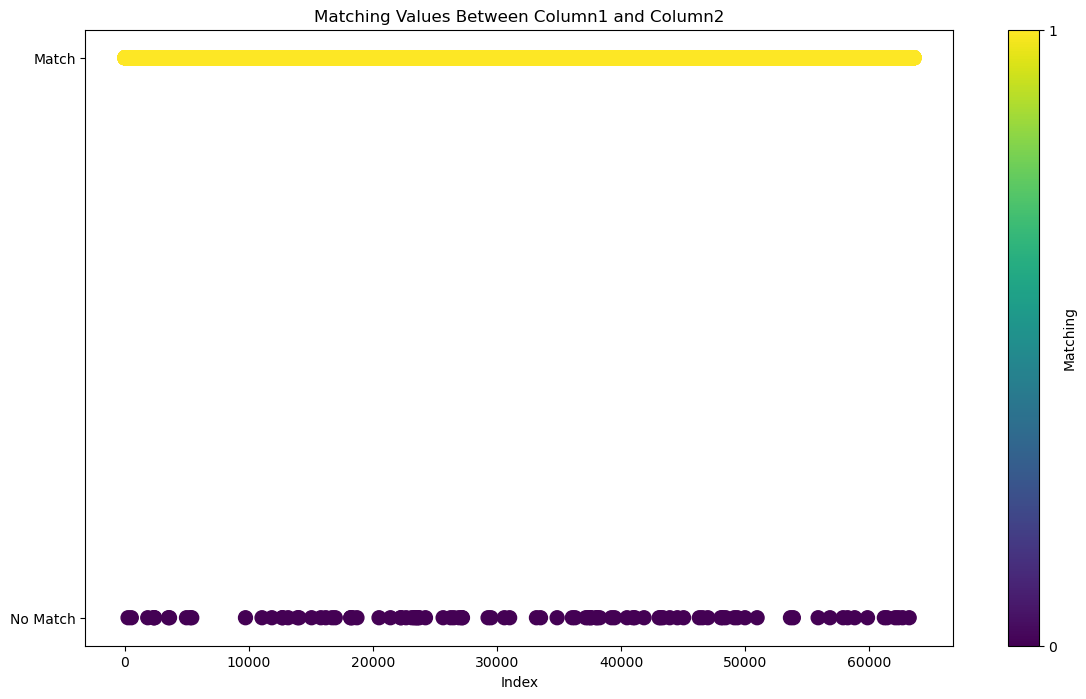

In [39]:
df=sample
df['Match'] = df['isFlaggedFraud'] == df['isFraud']

# Plotting
fig, ax = plt.subplots()
scatter = ax.scatter(range(len(df)), df['Match'], c=df['Match'], cmap='viridis', s=100)

# Customize plot
ax.set_yticks([0, 1])
ax.set_yticklabels(['No Match', 'Match'])
ax.set_title('Matching Values Between Column1 and Column2')
ax.set_xlabel('Index')

# Adding a colorbar for better visualization
cbar = plt.colorbar(scatter, ticks=[0, 1])
cbar.set_label('Matching')

plt.show()

## Evaluation of Key Factors

The identified factors provide valuable insights into potential predictors of fraudulent transactions. Let's analyze their sensibility:

1. **Amount of Transaction:**
   - *Observation:* Higher transaction amounts tend to have fewer instances of fraud.
   - *Explanation:* This observation aligns with common sense, as fraudsters may prefer smaller transactions to avoid detection and suspicion.

2. **New Balance of Customer:**
   - *Observation:* Higher new balances for customers are associated with a lower number of fraud instances.
   - *Explanation:* A higher new balance for customers suggests that they have successfully completed transactions, reducing the likelihood of being involved in fraud.

3. **Old Balance of Merchants:**
   - *Observation:* Higher old balances for merchants are associated with a lower number of fraud instances.
   - *Explanation:* Merchants with higher old balances may have established, legitimate businesses, making them less likely to engage in fraudulent activities.

4. **New Balance of Merchants:**
   - *Observation:* Higher new balances for merchants are associated with a lower number of fraud instances.
   - *Explanation:* Similar to customers, a higher new balance for merchants may indicate successful and legitimate transactions, reducing the likelihood of fraud.

5. **IsFlaggedFraud:**
   - *Observation:* The 'isFlaggedFraud' feature predicts fraud correctly in a significant number of cases but may not perform well at detecting outliers.
   - *Explanation:* The 'isFlaggedFraud' feature likely captures specific conditions or flags set by the system to identify potential fraud. However, its limitations in detecting outliers suggest that additional factors or features may be necessary for a comprehensive fraud detection model.

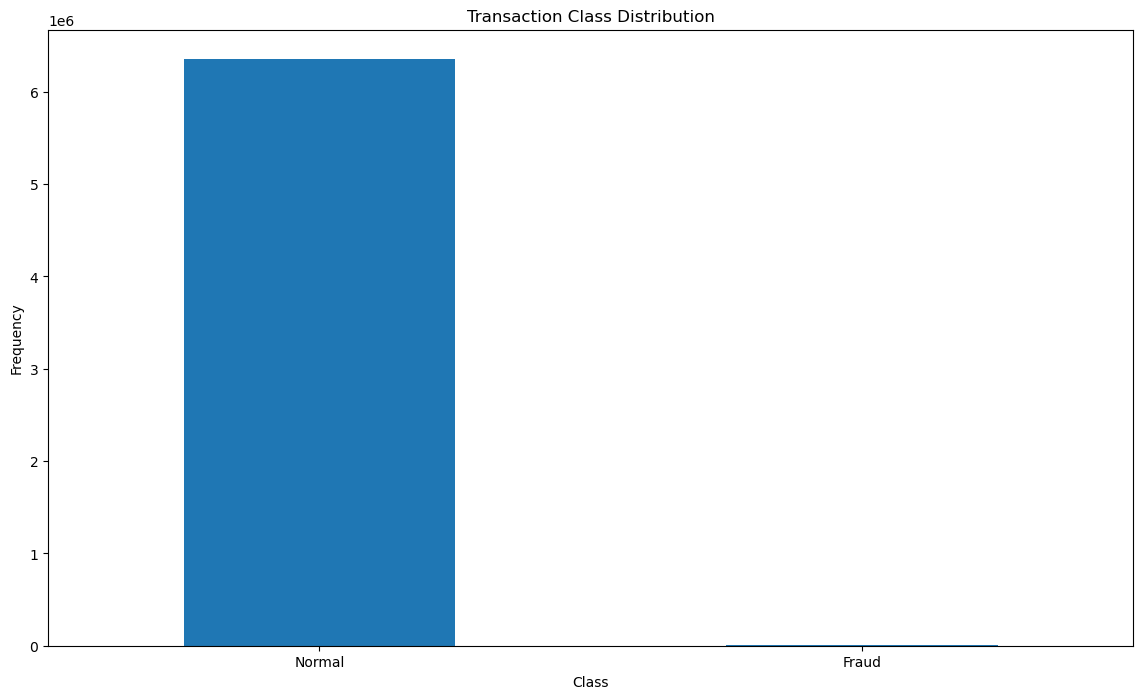

In [10]:
#Determine the number of fraud and valid transactions in the entire dataset

count_classes = pd.value_counts(data['isFraud'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [11]:
#Assigning the transaction class "0 = NORMAL  & 1 = FRAUD"
Normal = data[data['isFraud']==0]
Fraud = data[data['isFraud']==1]

In [12]:
Normal.shape #data with Normal Transaction

(6354407, 13)

In [13]:
Fraud.shape #data with Fraud transaction

(8213, 13)

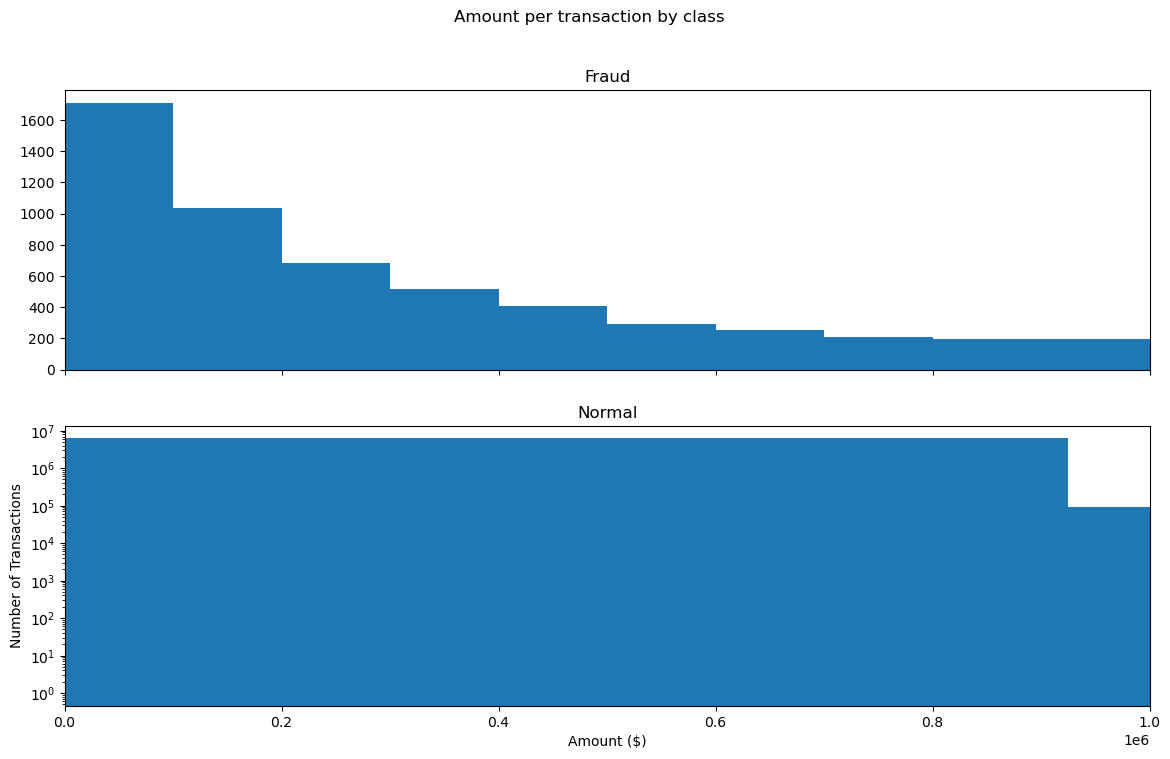

In [14]:
#Let's have a more graphical representation of the data

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 100
ax1.hist(Fraud.amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(Normal.amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 1000000))
plt.yscale('log')
plt.show();

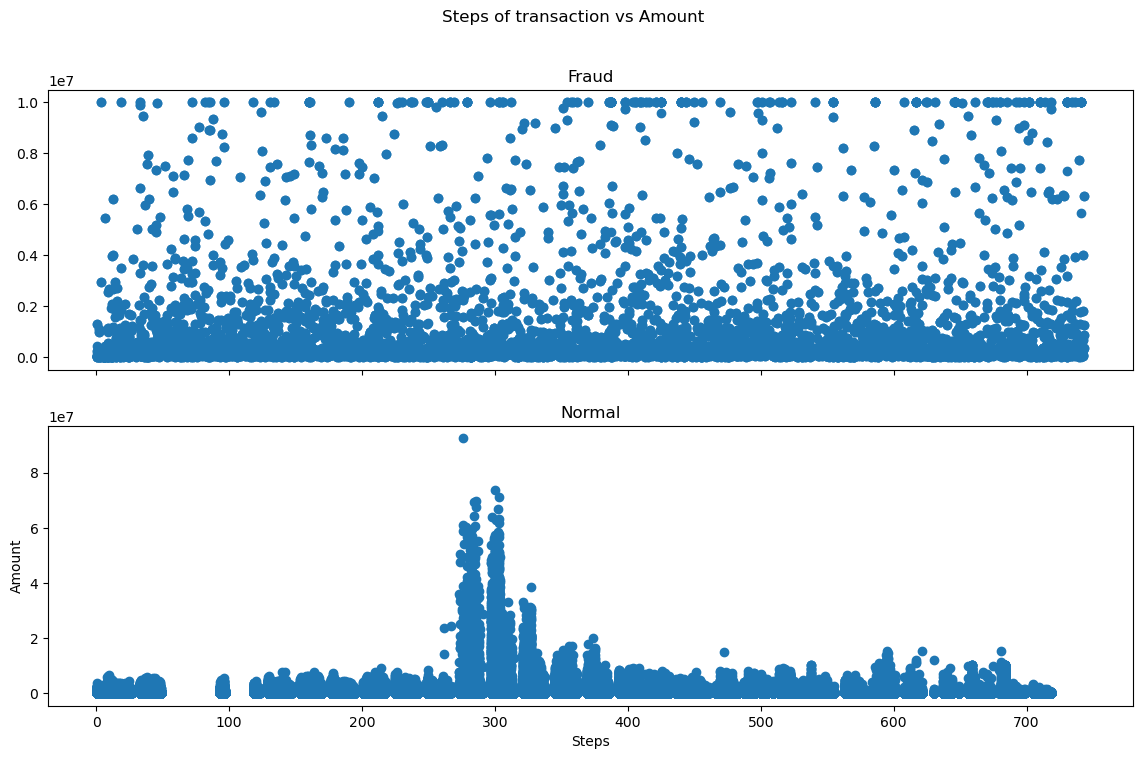

In [15]:
#Graphical representation of the data
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Steps of transaction vs Amount')
ax1.scatter(Fraud.step, Fraud.amount)
ax1.set_title('Fraud')
ax2.scatter(Normal.step, Normal.amount)
ax2.set_title('Normal')
plt.xlabel('Steps')
plt.ylabel('Amount')
plt.show();

In [18]:
#Determine the number of fraud and valid transactions in the dataset.

Fraud = data[data['isFraud']==1]
Normal = data[data['isFraud']==0]
outlier_fraction = len(Fraud)/float(len(Normal)) #fraction of outliers in data

In [20]:
print(outlier_fraction)
print("Fraud Cases : {}".format(len(Fraud)))
print("Valid Cases : {}".format(len(Normal)))

0.0012924888191769902
Fraud Cases : 8213
Valid Cases : 6354407


In [21]:
#Get all the columns from the dataframe

columns = data.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["isFraud"]]
# Store the variable we are predicting
target = "isFraud"
# Define a random state
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(6362620, 12)
(6362620,)


In [22]:
# Scale and normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [23]:
X #scaled data

array([[-1.70304158e+00, -2.81559923e-01, -2.29810037e-01, ...,
        -8.09596451e-02,  1.39903602e+00, -3.02345156e-01],
       [-1.70304158e+00, -2.94767262e-01, -2.81359380e-01, ...,
        -8.09596451e-02,  1.39903602e+00, -3.02345156e-01],
       [-1.70304158e+00, -2.97554804e-01, -2.88653782e-01, ...,
        -8.09596451e-02, -7.14777880e-01,  3.30747816e+00],
       ...,
       [ 3.51012348e+00,  1.01539526e+01,  1.89649113e+00, ...,
        -8.09596451e-02, -7.14777880e-01, -3.02345156e-01],
       [ 3.51012348e+00,  1.10976490e+00,  5.58104668e-03, ...,
        -8.09596451e-02, -7.14777880e-01,  3.30747816e+00],
       [ 3.51012348e+00,  1.10976490e+00,  5.58104668e-03, ...,
        -8.09596451e-02, -7.14777880e-01, -3.02345156e-01]])

In [26]:
# Split the data in train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [27]:
y_train.sum() #number of ouliers of dataset in training dataset

7396

In [28]:
y_test.sum() #number of ouliers of dataset in training dataset

817

In [29]:
clf=IsolationForest(n_estimators=100, max_samples=len(X_train), contamination=0.001,random_state=state, verbose=0)
clf_name="IsolationForest" #use Isolation forest to classify our data and finding outliers

In [30]:
clf.fit(X_train)
# fit the model

IsolationForest(contamination=0.001, max_samples=5726358,
                random_state=RandomState(MT19937) at 0x11DC7313040)

In [31]:
scores_prediction = clf.decision_function(X_train)
y_pred_train = clf.predict(X_train)
y_pred_train[y_pred_train == 1] = 0
y_pred_train[y_pred_train == -1] = 1
n_errors = (y_pred_train != y_train).sum()

In [32]:
print("{}: {}".format(clf_name,n_errors))
print("Accuracy Score :")
print(accuracy_score(y_train,y_pred_train))
print("Classification Report :")
print(classification_report(y_train,y_pred_train))

IsolationForest: 11225
Accuracy Score :
0.9980397662877522
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   5718962
           1       0.17      0.13      0.14      7396

    accuracy                           1.00   5726358
   macro avg       0.58      0.56      0.57   5726358
weighted avg       1.00      1.00      1.00   5726358



In [33]:
# Evaluate the model
conf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[5714184    4778]
 [   6447     949]]


## Model Performance Demonstration

### Test Data Performance

I assessed the performance of the fraud detection model on the test data, yielding the following results:

- **Accuracy:** 99.79%

- **Confusion Matrix:**[[634850    580]
                        [   729    103]]


In [41]:
scores_prediction = clf.decision_function(X_test)
y_pred = clf.predict(X_test)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != y_test).sum()

In [42]:
print("{}: {}".format(clf_name,n_errors))
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))
print("Classification Report :")
print(classification_report(y_test,y_pred))

IsolationForest: 1287
Accuracy Score :
0.997977248366239
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    635445
           1       0.14      0.11      0.12       817

    accuracy                           1.00    636262
   macro avg       0.57      0.55      0.56    636262
weighted avg       1.00      1.00      1.00    636262



In [43]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[634885    560]
 [   727     90]]


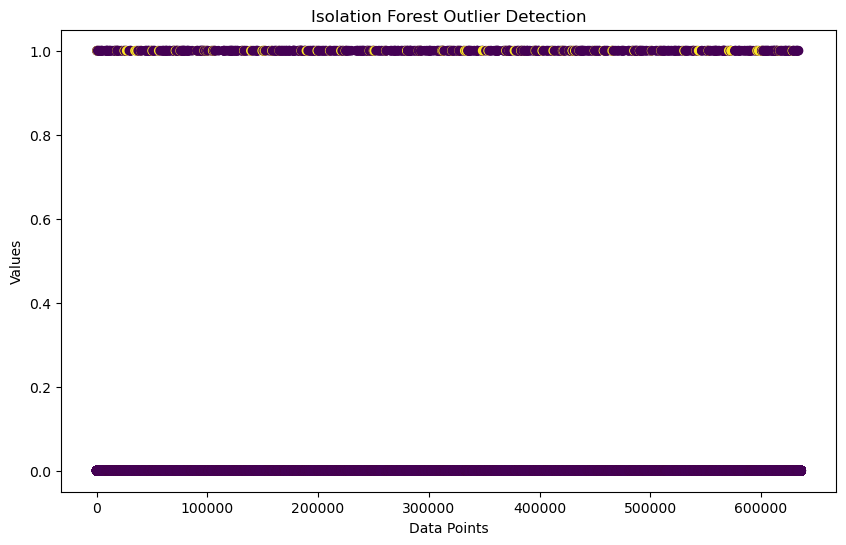

In [50]:
# Plot the results
plt.figure(figsize=(10, 6))

# Inliers (1) are plotted in blue, outliers (-1) in red
plt.scatter(range(len(y_test)), y_test, c=y_pred, cmap='viridis')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Isolation Forest Outlier Detection')
plt.show()

## Prevention Measures for Infrastructure Update
1. **Enhanced Authentication and Authorization:**
   - Implement robust authentication mechanisms, such as multi-factor authentication (MFA), to ensure only authorized users access sensitive systems and perform transactions.

2. **Real-time Monitoring and Alerts:**
   - Employ real-time monitoring systems to detect unusual patterns or anomalies in transaction data. Set up automated alerts to notify security personnel of any suspicious activities.

3. **Transaction Analysis and Machine Learning:**
   - Implement advanced analytics and machine learning models to analyze transaction patterns and identify abnormal behaviors, adapting over time to detect new types of fraud.
4. **Encryption and Secure Communication:**
   - Ensure all communications, especially those involving sensitive data, are encrypted. Use secure communication protocols to protect information during transit.

5. **Regularly Update Security Protocols:**
    - Stay current with the latest security protocols and update systems regularly. Apply patches promptly to address known vulnerabilities.

## Evaluating the Effectiveness of Security Measures
1. **Monitoring and Analysis:**
   - Continuously monitor security logs and analyze them for any unusual activities or patterns. This includes reviewing logs generated by authentication mechanisms, transaction analysis, and other security tools.

2. **False Positive/Negative Analysis:**

   - Regularly analyze alerts generated by monitoring systems. Evaluate the rate of false positives (incorrectly identified threats) and false negatives (missed threats). Adjust thresholds and rules to minimize false positives while ensuring genuine threats are not overlooked.

3. **Machine Learning Model Evaluation:**
   - Evaluate the performance of the machine learning models regularly. Assess metrics such as precision, recall, and accuracy. Incorporate new labeled data to retrain the models and ensure they adapt to evolving fraud patterns.

4. **User Feedback and Reporting:**

   - Encourage users to report any suspicious activities or issues they encounter. Analyze user feedback and reports to identify potential security concerns and address them promptly.

